In [1]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

Matplotlib is building the font cache; this may take a moment.


In [2]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
ds = [xr.open_dataset(path+f) for f in files]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
files

['1okha.nc',
 '2mumbai_17_23.nc',
 '3jaigrah_new.nc',
 '4goa_17_23.nc',
 '5udupi.nc',
 '6kollam_17_23.nc',
 '7kanyakumari.nc']

In [5]:
ds = [xr.open_dataset(path+f) for f in files]

In [6]:
ds[0].resample(TIME="24H").mean()

<xarray.Dataset>
Dimensions:  (LON: 1, LAT: 1, DEPTH: 75, TIME: 1554)
Coordinates:
  * LON      (LON) float32 67.47
  * LAT      (LAT) float32 22.26
  * DEPTH    (DEPTH) float64 0.0 4.0 8.0 12.0 16.0 ... 284.0 288.0 292.0 296.0
  * TIME     (TIME) datetime64[ns] 2018-10-01 2018-10-02 ... 2023-01-01
Data variables:
    BIOMASS  (TIME, DEPTH, LAT, LON) float64 nan nan nan nan ... nan nan nan nan
    BS       (TIME, DEPTH, LAT, LON) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Dec 21 20:28:06 2023: cdo mergetime OOD1A_bs_bm.nc OOD2...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

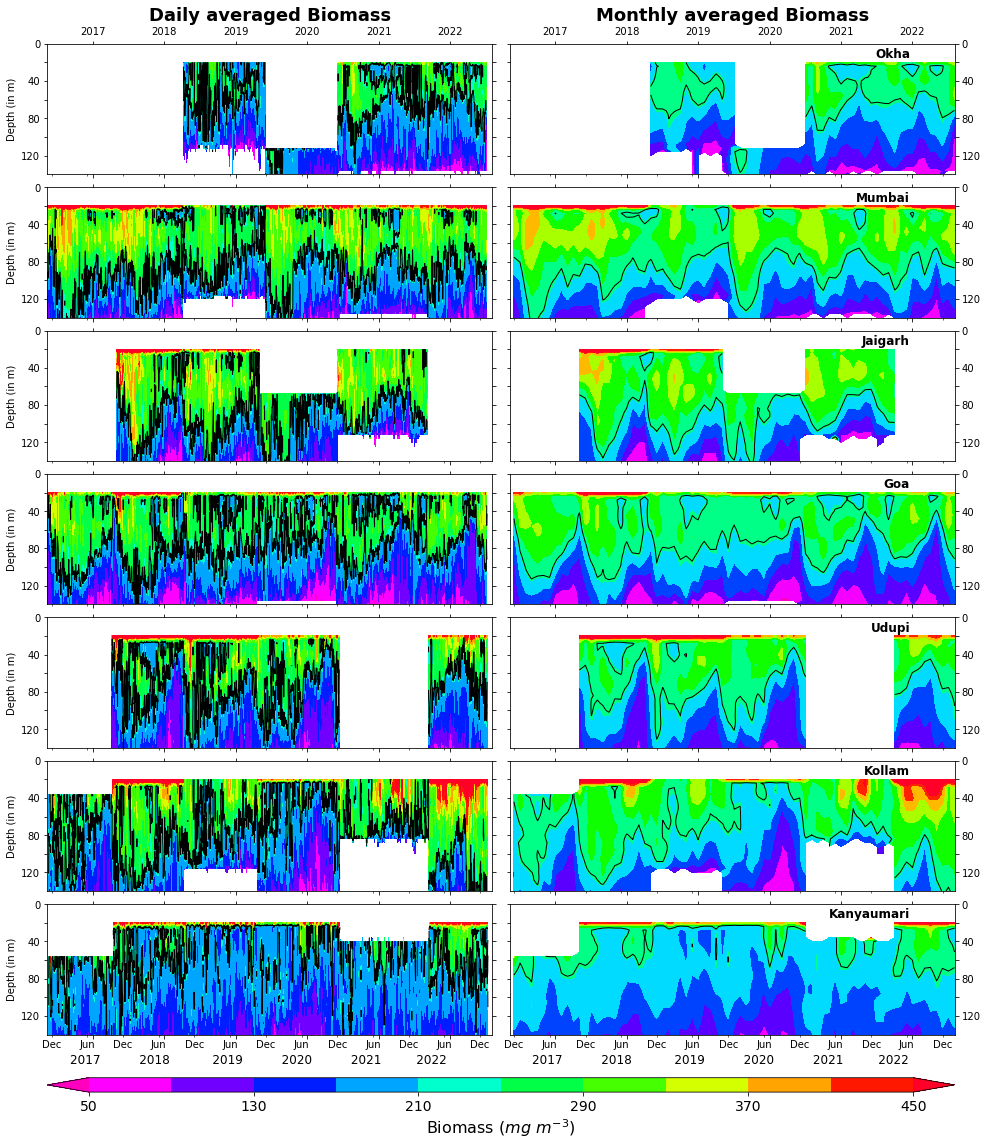

In [7]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(14,16),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
custom_ticks = [0,20,40,60,80,100,120]
custom_labels = ['0','','40','','80','',120]
for i in range(7):
    dsd = ds[i].resample(TIME='24H').mean()
    dsm = ds[i].resample(TIME='M').mean()
    x = ax[i,0].contourf(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=np.arange(50,490,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contourf(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=np.arange(50,450,40),extend="both",cmap="gist_rainbow_r")
    ax[i,1].contour(dsm.TIME,dsm.DEPTH[5:],dsm.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=1,colors='k')
    ax[i,0].contour(dsd.TIME,dsd.DEPTH[5:],dsd.BIOMASS[:,5:,0,0].T,levels=[215],linewidths=1,colors='k')
    ax[i,1].text(0.9, 0.97, names[i],transform=ax[i,1].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i,0].set_ylabel("Depth (in m)")
    ax[i,0].set_yticks(custom_ticks)
    ax[i,0].set_yticklabels(custom_labels)
#    ax[i,1].set_yticks(custom_ticks)    
    ax[i,0].tick_params(right=True, top=True,labeltop=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True)
    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()
    ax[i,0].set_xticks([])
    ax[i,1].set_xticks([])
    ax[i,0].xaxis.set_major_locator(mdates.YearLocator(1, month=6, day=30))
    ax[i,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    ax[i,0].tick_params(right=True, top=True,labeltop=False,labelbottom=False)
    ax[i,1].tick_params(right=True, top=True,labelright=True,labelbottom=False)

    ax[i,0].set_ylim(ymin=0,ymax=140)
    ax[i,1].invert_yaxis()

ax[0,0].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[6,12]))
ax[0,0].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax[0,0].tick_params(right=True, top=True,labeltop=True)
ax[0,1].tick_params(right=True, top=True,labelright=True,labeltop=True)

ax[0,0].set_title("Daily averaged Biomass",fontsize=18,fontweight='bold')
ax[0,1].set_title("Monthly averaged Biomass",fontsize=18,fontweight='bold')

ax[6,0].text(0.05, -0.2, "2017          2018           2019          2020          2021         2022",transform=ax[6,0].transAxes, fontsize=12, va='center', ha='left',color='black')
ax[6,1].text(0.05, -0.2, "2017          2018           2019          2020          2021         2022",transform=ax[6,1].transAxes, fontsize=12, va='center', ha='left',color='black')


cax = fig.add_axes([0.05, 0.04, 0.9,0.0125])
cbar = fig.colorbar(x, cax=cax, orientation="horizontal",)
cbar.set_label("Biomass ($mg \ m^{-3}$)",fontsize=16)
cbar.ax.tick_params(labelsize=14)

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/biomass_daily_monthly.png",dpi=300,facecolor='w')

In [ ]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
ds = [xr.open_dataset(path+f) for f in files]


In [ ]:
dsd = [ds[i].resample(TIME='24H').mean() for i in range(len(files))]
dsm = [ds[i].resample(TIME='M').mean() for i in range(len(files))]


In [ ]:
## Standing stock

fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(14,16),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
plt.subplots_adjust(wspace=0.04,left=0.05,bottom=0.09,top=0.95,hspace=0.1,right = 0.95)
for i in range(7):
    x = ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,5:30,0,0].T.mean(axis=0),linewidth=0.7,color='k')
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,5:30,0,0].T.mean(axis=0),linewidth=1,color='r')
    ax[i].text(0.9, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].set_ylim(ymin=100,ymax=400)
    


# climatology of standing stock

In [14]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/ss/depth_avl/ss/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])


In [15]:
files

['ss_01okha.nc',
 'ss_02mumbai_17_23.nc',
 'ss_03jaigarh.nc',
 'ss_04goa_17_23.nc',
 'ss_05udupi.nc',
 'ss_06kollam.nc',
 'ss_07kanyakumari.nc']

In [16]:
dsd = [xr.open_dataset(path+f) for f in files]


In [17]:
dsm = [dsd[i].resample(TIME='1M').mean() for i in range(len(files))]


In [18]:
for i in range(7):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    print(aa.min().values,aa.max().values,"range",aa.min().values-aa.max().values)

16.36294798799601 21.251607115008586 range -4.888659127012577
20.030676455727548 27.06239200020423 range -7.031715544476683
18.684939685515833 26.087149433228564 range -7.402209747712732
15.82983413570522 22.410345177202345 range -6.580511041497125
16.212585216881436 22.26083271538792 range -6.048247498506484
18.669093802795715 22.862451011235823 range -4.1933572084401085
17.33458425112007 18.978339530950596 range -1.6437552798305255


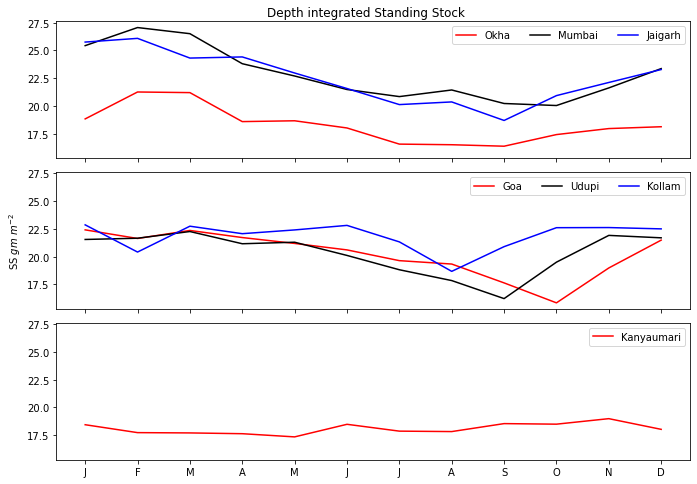

In [20]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,7),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
colors = ['r','k','b','r','k','b','r']

#linestyles = ['-','--','-.','-','--','-.','-']

plt.subplots_adjust(wspace=0.04,left=0.07,bottom=0.08,top=0.95,hspace=0.1,right = 0.95)
for i in range(3):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T
    aa = aa.where(aa!=0,np.nan)
    ax[0].plot(aa,color=colors[i],label=names[i])
ax[0].legend(bbox_to_anchor=(1,1), ncol=3)

for i in range(3,6):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T    
    aa = aa.where(aa!=0,np.nan)
    ax[1].plot(aa,color=colors[i],label=names[i])
ax[1].legend(bbox_to_anchor=(1,1), ncol=3)
ax[1].set_ylabel("SS $gm \ m^{-2}$")
for i in range(6,7):
    clim = dsm[i].groupby('TIME.month').mean(dim='TIME')
    aa = clim.SS[:,0,0].T 
    aa = aa.where(aa!=0,np.nan)
    ax[2].plot(aa,color=colors[i],label=names[i])
ax[2].legend(bbox_to_anchor=(1,1), ncol=3)


ax[2].set_xticks(np.arange(0,12,1))
ax[2].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
fig.suptitle("Depth integrated Standing Stock")

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/standing_stock_dep_22_118_all_aval.png",dpi=300,facecolor='w')


# 40 and 100 m biomass comparison

In [2]:
path="/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/"
files=sorted([f for f in os.listdir(path) if f.endswith('.nc')])
ds = [xr.open_dataset(path+f) for f in files]

In [3]:
dsd = [ds[i].resample(TIME='24H').mean() for i in range(len(files))]

In [4]:
dsm = [ds[i].rolling(TIME=720,min_periods=48).mean() for i in range(len(files))]

In [5]:
import pandas as pd
axvd = ["01-01-2018","01-01-2019","01-01-2020","01-01-2021","01-01-2022","01-01-2023"]
axvdates = [pd.to_datetime(e) for e in axvd]

In [6]:
## Standing stock

fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(10,12),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
plt.subplots_adjust(wspace=0.04,left=0.07,bottom=0.06,top=0.95,hspace=0.1,right = 0.97)
for i in range(7):
    
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,10,0,0].T,linewidth=0.6,color='grey',label="daily biomass (40m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,10,0,0].T,linewidth=1,color='k',label="monthly biomass (40m)")
    # plot the mean line for each
    ax[i].axhline(dsm[i].BIOMASS[:,10,0,0].T.mean(),linewidth=0.6,linestyle='--',color='black',label="mean (40m)")
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,26,0,0].T,linewidth=0.6,color='cyan',label="daily biomass (104m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,26,0,0].T,linewidth=1,color='blue',label="monthly biomass (104m)")

    ax[i].axhline(dsm[i].BIOMASS[:,26,0,0].T.mean(),linewidth=0.6,linestyle='--',color='blue',label="mean (104m)")
    
    ax[i].text(0.95, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].tick_params(axis='both', which='both', direction='in', right=True, top=True)
    for j in range(len(axvd)):
        ax[i].axvline(axvdates[j],linewidth=0.5)
    ax[i].set_xlim(xmin=dsd[i].TIME[0],xmax=dsd[i].TIME[-1])
    ax[i].set_ylim(ymin=70,ymax=400)
    ax[i].set_xticks([])
ax[3].set_ylabel('Biomass ($in mg \ m^{-3}$)',fontsize=14)    
ax[0].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[6,12]))
ax[0].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))


#ax[0].tick_params(right=True, top=True,labeltop=True)
#ax[0].tick_params(right=True, top=True,labelright=True,labeltop=True)

ax[6].text(0.06, -0.2, "2017                    2018                    2019                    2020                    2021                    2022",transform=ax[6].transAxes, fontsize=12, va='center', ha='left',color='black')

ax[0].legend(loc='upper left')

ax[6].set_xlabel("Time",fontsize=14,fontweight='bold')

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/backscatternew/bm_merged/figure_02_biomass_40m_104m.png",dpi=300,facecolor='w')

Error in callback <function flush_figures at 0x7fac02d265f0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Text(0.5, 0, 'Time')

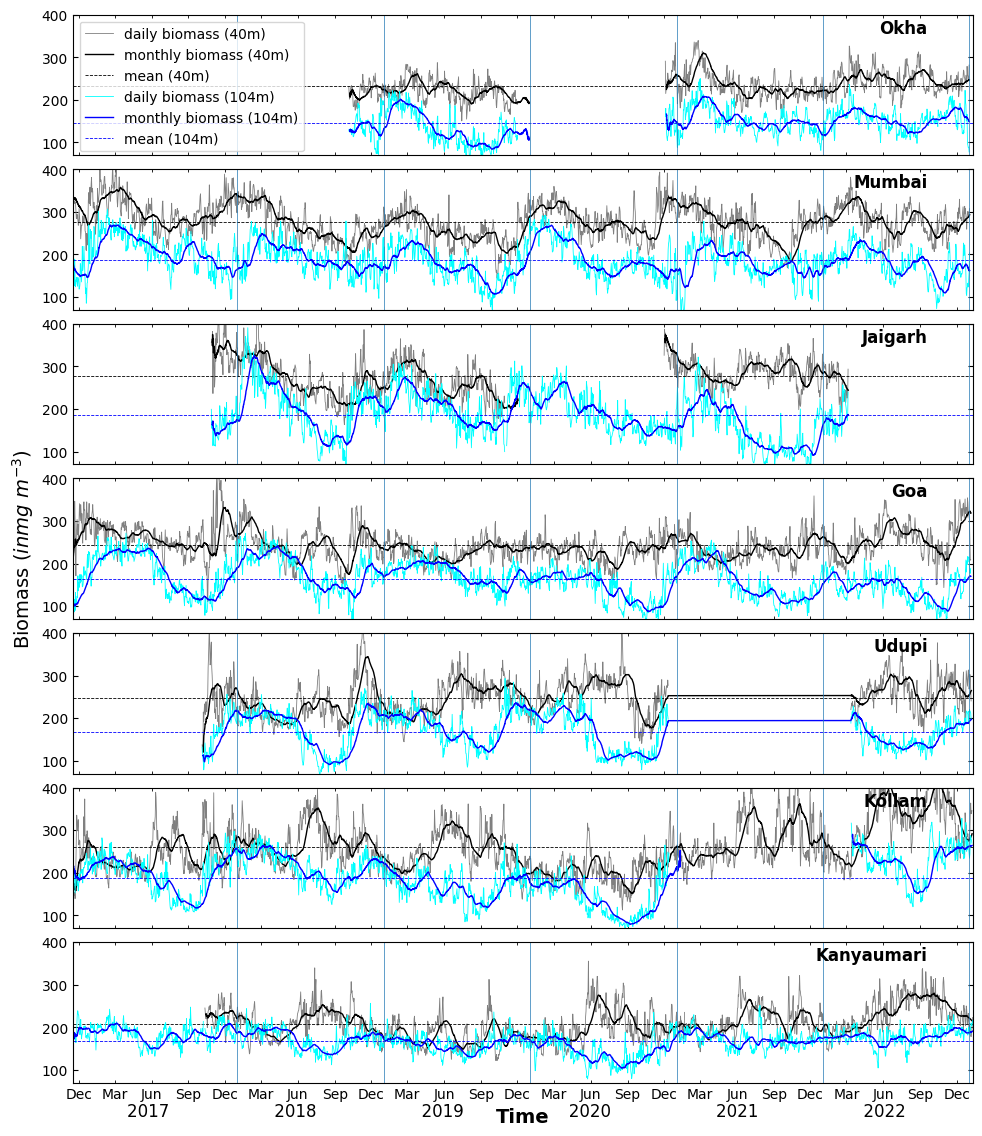

In [8]:
## Standing stock
fig, ax = plt.subplots(nrows=7,ncols=1,figsize=(10,12),sharex=True,sharey=True)
names = ["Okha",'Mumbai','Jaigarh',"Goa","Udupi","Kollam","Kanyaumari"]
plt.subplots_adjust(wspace=0.04,left=0.07,bottom=0.06,top=0.95,hspace=0.1,right = 0.97)
for i in range(7):
    
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,10,0,0].T,linewidth=0.6,color='grey',label="daily biomass (40m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,10,0,0].T,linewidth=1,color='k',label="monthly biomass (40m)")
    # plot the mean line for each
    ax[i].axhline(dsm[i].BIOMASS[:,10,0,0].T.mean(),linewidth=0.6,linestyle='--',color='black',label="mean (40m)")
    ax[i].plot(dsd[i].TIME,dsd[i].BIOMASS[:,26,0,0].T,linewidth=0.6,color='cyan',label="daily biomass (104m)")
    ax[i].plot(dsm[i].TIME,dsm[i].BIOMASS[:,26,0,0].T,linewidth=1,color='blue',label="monthly biomass (104m)")

    ax[i].axhline(dsm[i].BIOMASS[:,26,0,0].T.mean(),linewidth=0.6,linestyle='--',color='blue',label="mean (104m)")
    
    ax[i].text(0.95, 0.97, names[i],transform=ax[i].transAxes, fontsize=12, va='top', ha='right',color='black',fontweight="bold")
    ax[i].tick_params(axis='both', which='both', direction='in', right=True, top=True)
    for j in range(len(axvd)):
        ax[i].axvline(axvdates[j],linewidth=0.5)
    ax[i].set_xlim(xmin=dsd[i].TIME[0],xmax=dsd[i].TIME[-1])
    ax[i].set_ylim(ymin=70,ymax=400)
    ax[i].set_xticks([])


ax[3].set_ylabel('Biomass ($in mg \ m^{-3}$)',fontsize=14)    
ax[0].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[3,6,9,12]))
ax[0].xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax[6].text(0.06, -0.2, "2017                    2018                    2019                    2020                    2021                    2022",transform=ax[6].transAxes, fontsize=12, va='center', ha='left',color='black')
ax[0].legend(loc='upper left')
ax[6].set_xlabel("Time",fontsize=14,fontweight='bold')